# Lab Chapter 2

### Load packages and read in data

In [14]:
library(tidyverse)
library(ggplot2)
library(ggpubr)

In [2]:
path = "/home/yeachan153/Desktop/BDS/R/Big Data Analytics/Big-Data-Analytics/Datasets/College.csv"
college = read.csv(path)

In [3]:
head(college)

X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


### Basic pre-processing

In [4]:
# Rename the column X to University
college = 
    college %>%
    rename(College = X)

### Data exploration and visualisation

#### Get summary information

In [5]:
summary(college)

                         College    Private        Apps           Accept     
 Abilene Christian University:  1   No :212   Min.   :   81   Min.   :   72  
 Adelphi University          :  1   Yes:565   1st Qu.:  776   1st Qu.:  604  
 Adrian College              :  1             Median : 1558   Median : 1110  
 Agnes Scott College         :  1             Mean   : 3002   Mean   : 2019  
 Alaska Pacific University   :  1             3rd Qu.: 3624   3rd Qu.: 2424  
 Albertson College           :  1             Max.   :48094   Max.   :26330  
 (Other)                     :771                                            
     Enroll       Top10perc       Top25perc      F.Undergrad   
 Min.   :  35   Min.   : 1.00   Min.   :  9.0   Min.   :  139  
 1st Qu.: 242   1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992  
 Median : 434   Median :23.00   Median : 54.0   Median : 1707  
 Mean   : 780   Mean   :27.56   Mean   : 55.8   Mean   : 3700  
 3rd Qu.: 902   3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.:

#### Plot a scatterplot of the first 10 columns

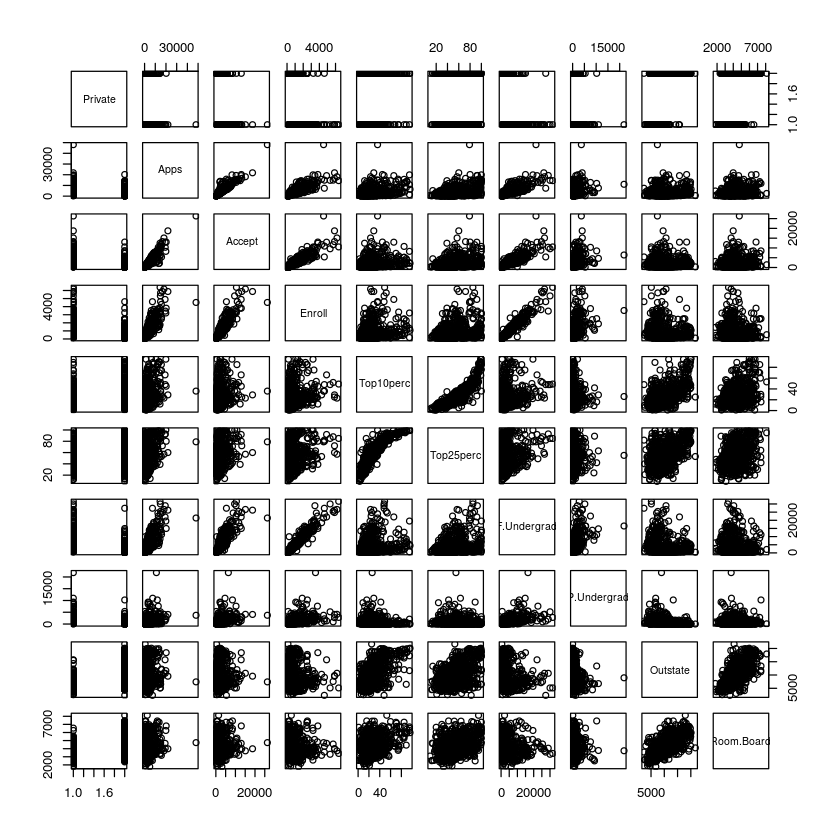

In [6]:
pairs(college[,2:11])

#### Create a boxplot of Outstate vs Private

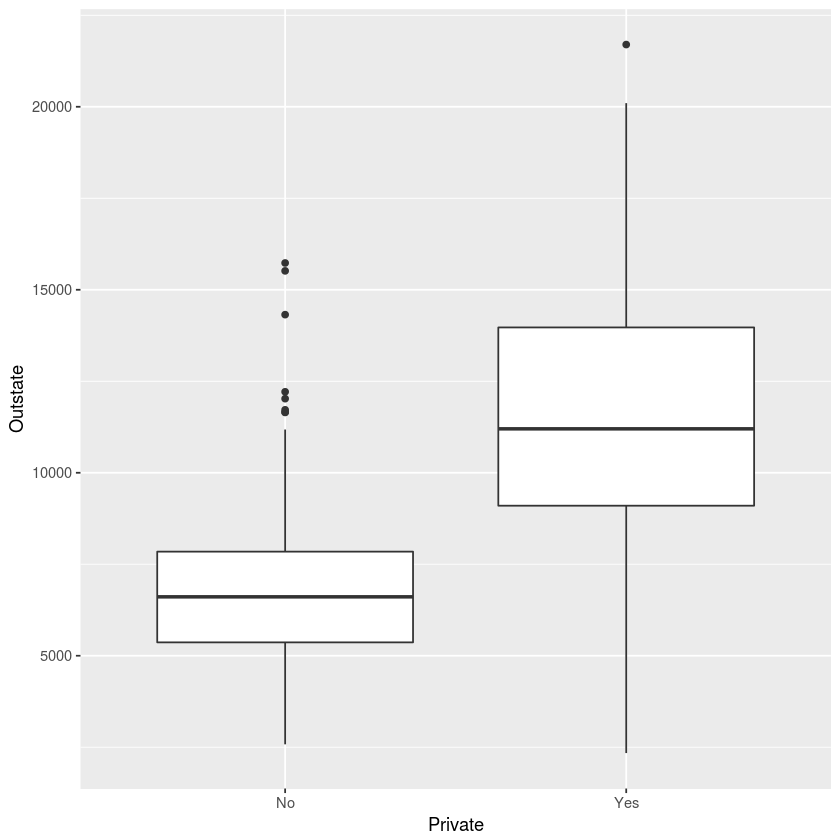

In [7]:
ggplot(data = college, 
       mapping = aes(x = Private, y = Outstate)) +
    geom_boxplot()

Looks like private colleges charge more tuition.

#### Create a new binary variable called Elite
Values are yes if the Top10perc column exceeds 50, else no.

In [15]:
college =
    college %>%
    mutate(Elite = ifelse(Top10perc > 50, "Yes", "No"))

In [9]:
# How many elite schools are there?
college %>%
    count(Elite)

Elite,n
No,699
Yes,78


Most colleges don't seem to be elite.

#### A boxplot can show whether elite schools charge more tuition

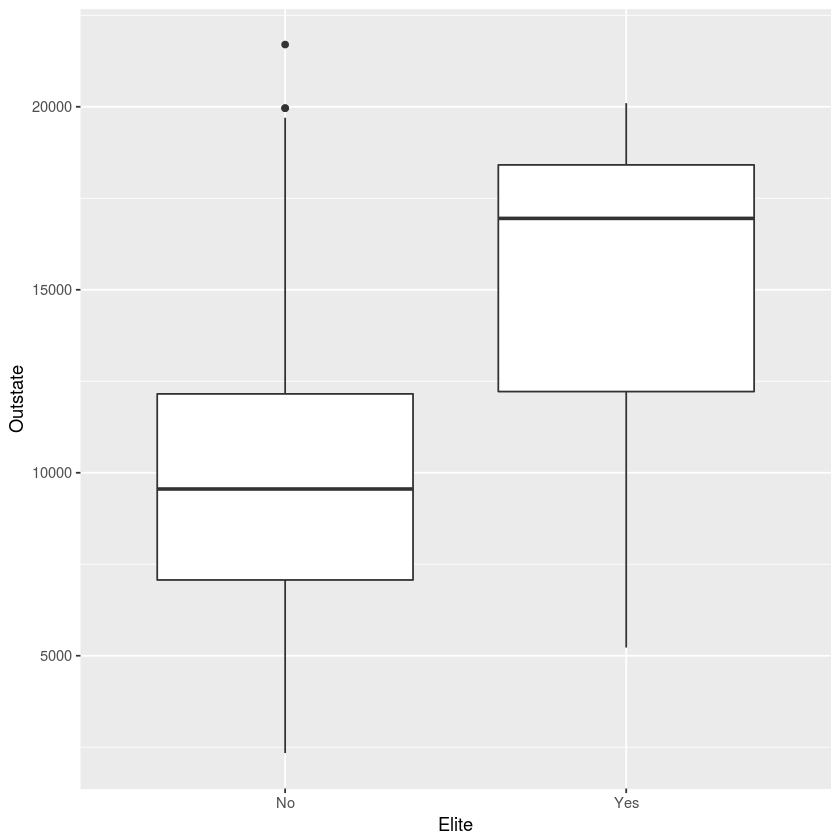

In [10]:
ggplot(data = college,
       mapping = aes(x = Elite, y = Outstate)) + 
    geom_boxplot()

Elite schools seem to charge more tuition.

#### Histograms can provide an idea of the distribution of continuous features

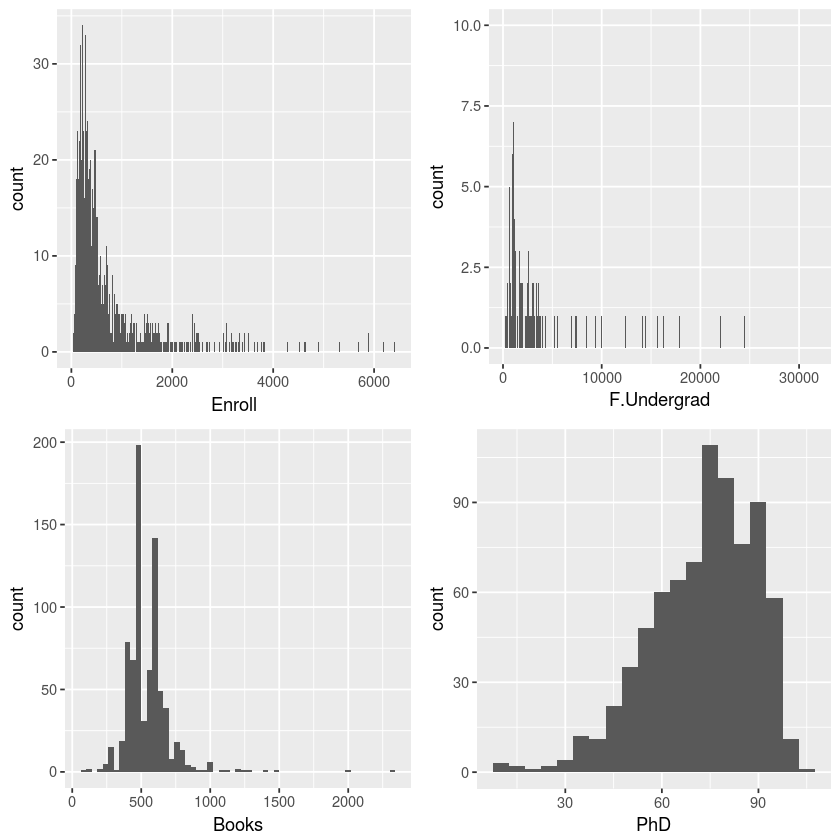

In [11]:
a = ggplot(data = college) +
        geom_histogram(aes(x = Enroll), binwidth = 20) 

b = ggplot(data = college) +
        geom_histogram(aes(x = F.Undergrad), binwidth = 10)

c = ggplot(data = college) +
        geom_histogram(aes(x = Books), binwidth = 40)

d = ggplot(data = college) +
        geom_histogram(aes(x = PhD), binwidth = 5)

# Similar to par(mfrow=c(2,2)) - but integrated to ggplot2
ggarrange(a,b,c,d,
          nrow = 2,
          ncol = 2)

## Questions on the Boston data 

In [31]:
library(MASS)
library(dplyr)

In [36]:
head(Boston)
dim(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506  14

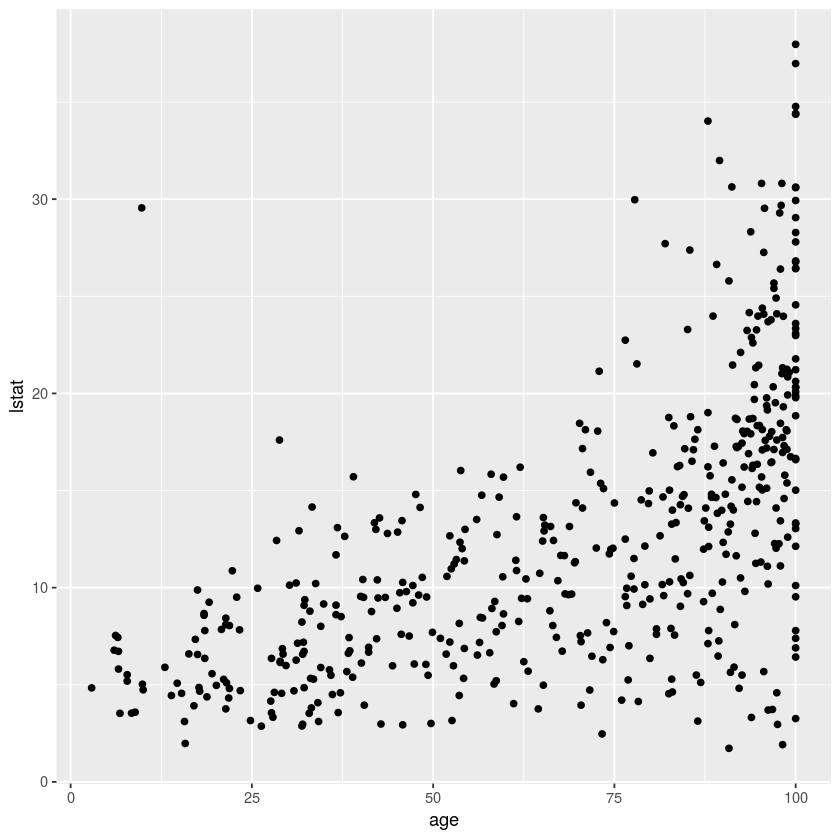

In [43]:
ggplot(Boston, aes(x = age, y = lstat)) +
    geom_point()

It looks like it's possible that the age of the property increases with the percentage of those in lower social status.